<a href="https://colab.research.google.com/github/pavi-1994/linear_regression/blob/main/Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression**

 Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

In Linear Regression there are two types:
1.  Simple and Multiple. Simple Linear Regression is where only one independent variable is present and the model has to find the linear relationship of it with the dependent variable

Whereas, 
2.  In Multiple Linear Regression there are more than one independent variables for the model to find the relationship.

Equation of **Simple Linear Regression**, 


y^=bo+ b1* x

where bo is the intercept, b1 is coefficient or slope, x is the independent variable and y is the dependent variable.

**Multiple linear regression**:


y^=bo+b1x1+b2x2+b3x3+.........+bnxn


Equation of Multiple Linear Regression, where bo is the intercept, b1,b2,b3,b4…,bn are coefficients or slopes of the independent variables x1,x2,x3,x4…,xn and y is the dependent variable.

A Linear Regression model’s main aim is to find the best fit linear line and the optimal values of intercept and coefficients such that the error is minimized.
Error is the difference between the actual value and Predicted value and the goal is to reduce this difference.



#### **Assumptions of simple linear regression**
Simple linear regression is a parametric test, meaning that it makes certain assumptions about the data. These assumptions are:

1. Homogeneity of variance (homoscedasticity): the size of the error in our prediction doesn’t change significantly across the values of the independent variable.
2. Independence of observations: the observations in the dataset were collected using statistically valid sampling methods, and there are no hidden relationships among observations.
3. Normality: The data follows a normal distribution.
Linear regression makes one additional assumption:

4. The relationship between the independent and dependent variable is linear: the line of best fit through the data points is a straight line (rather than a curve or some sort of grouping factor).





**Evaluation Metrics**:

1. **Mean Squared Error (MSE)**: Measures the average squared difference between the predicted and actual values. Lower values indicate better model performance.

2. **Root Mean Squared Error (RMSE)**: The square root of MSE, which provides an interpretable metric in the same units as the dependent variable.

3. **Mean Absolute Error (MAE)**: Measures the average absolute difference between the predicted and actual values. It is less sensitive to outliers compared to MSE.

4. **R-squared (R²)**: Represents the proportion of the variance in the dependent variable explained by the independent variables. It ranges from 0 to 1, with higher values indicating a better fit.

5. **Adjusted R-squared**: Similar to R-squared but accounts for the number of independent variables and sample size. It penalizes the addition of irrelevant variables.

6. **Residual Analysis**: Analyzing the residuals (the differences between predicted and actual values) helps assess the model's performance, including checking for homoscedasticity, normality, and independence of residuals.



### simple linear regression:



In [1]:
#import libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_file="/content/drive/MyDrive/almabetter/personal/linear regression/income.data.csv"

In [4]:
income_data=pd.read_csv(data_file)
income_data.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [5]:
income_data.shape

(498, 3)

In [6]:
income_data.columns

Index(['Unnamed: 0', 'income', 'happiness'], dtype='object')

In [7]:
income_data.isnull().sum()

Unnamed: 0    0
income        0
happiness     0
dtype: int64

In [8]:
income_data.drop('Unnamed: 0', axis=1)

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398
...,...,...
493,5.249209,4.568705
494,3.471799,2.535002
495,6.087610,4.397451
496,3.440847,2.070664


checking Assumptions:
1. Linear relation between dependent and independen variable

<Axes: xlabel='income', ylabel='happiness'>

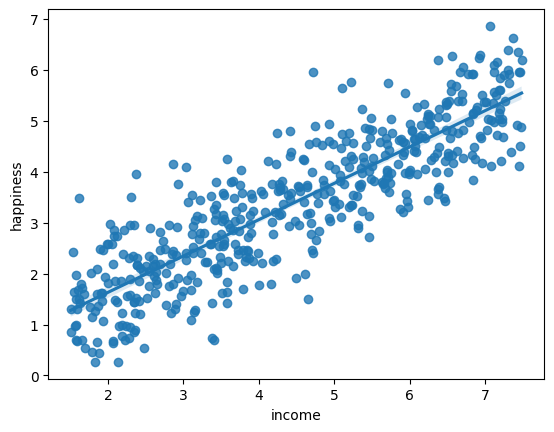

In [9]:
#plot regression plot 
sns.regplot(x='income', y='happiness', data=income_data)

Income and happiness are linearly related to each other.

2. Normal distribution

(array([20., 40., 61., 68., 72., 82., 75., 46., 27.,  7.]),
 array([0.26604366, 0.92577809, 1.58551252, 2.24524695, 2.90498138,
        3.56471581, 4.22445024, 4.88418466, 5.54391909, 6.20365352,
        6.86338795]),
 <BarContainer object of 10 artists>)

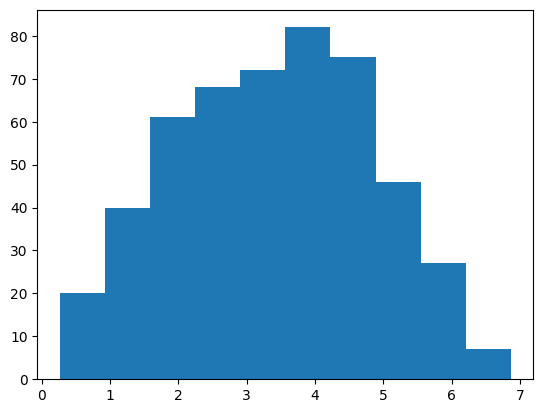

In [10]:
plt.hist(income_data["happiness"])

**Prepare the data**: Extract the independent variable (X) and dependent variable (y) from the dataset. Ensure that the data is in the appropriate format for modeling.

In [11]:
# Extract X and y
X = income_data['income'].values.reshape(-1, 1)
y = income_data['happiness'].values

**Split the data**: Split your dataset into a training set and a testing set. The training set will be used to build the model, while the testing set will be used to evaluate its performance.
python
Cop

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Build the regression model**: Create an instance of the LinearRegression class and fit the model to the training data.

In [13]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

**Evaluate the model**: Once the model is trained, use it to make predictions on the testing data and assess its performance. One common metric to evaluate the model's accuracy is the mean squared error (MSE).

In [14]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5901463943118466


**Interpret the results**: Finally, analyze the coefficients of the model to understand the relationship between the independent and dependent variables. You can access the slope and intercept of the line using model.coef_ and model.intercept_, respectively.

In [15]:
# Access the coefficients
slope = model.coef_[0]
intercept = model.intercept_

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.7247687016181724
Intercept: 0.14170387223712
